# Converting Shape Geoms to Raster Image
---

## Setup Notebook
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, shape, Point

from osgeo import gdal
from osgeo import ogr

## Binary Point Raster Burn
---

In [ ]:
# Load Data
rst = '/workspace/data-sets/Land_Cover/nyc-lc-2-2.tif'
shape = '/workspace/data-sets/DEPCatchbasins/DEPCATCHBASINS.shp'

In [ ]:
raster = rasterio.open(rst)
v_df = gpd.read_file(shape)
v_df.head()

In [ ]:
layer = vector.GetLayer()
ext = layer.GetExtent()
feature = layer.GetFeature(1)

In [ ]:
layer.GetFeatureCount()

In [ ]:
feature.GetField('UNITID')

In [ ]:
geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector['id']))
rasterized = features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = -5,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = np.int16)

## Multipoint Raster Burn
---

## Extra Point Extraction
---

In [39]:
## Extract Z Values and convert geo to point
# load data from geo data base
vector = plan_data_list[14]

# Extract Z Values
x_list = []
y_list = []
z_list = []
for feature in vector.geometry:
    coords = list(feature.coords)
    x_list.append(coords[0][0])
    y_list.append(coords[0][1])
    z_list.append(coords[0][2])

# Append Z values to dataframe
vector['x'] = x_list
vector['y'] = y_list
vector['z'] = z_list

vector['geometry'] = gpd.points_from_xy(vector.x, vector.y, crs=vector.crs)
vector.head()

,ELEVATION,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,geometry,x,y,z
0,129.740000,2.130200e+10,3020,302000,Unchanged,POINT (989083.000 195003.260),989082.999837,195003.259978,129.7400
1,120.586263,2.130000e+10,3000,300020,Unchanged,POINT (987638.301 195007.228),987638.300954,195007.227818,120.5863
2,114.740000,2.130200e+10,3020,302000,Unchanged,POINT (988565.410 195011.600),988565.409993,195011.599856,114.7400
3,69.130000,2.130200e+10,3020,302000,Unchanged,POINT (989509.570 195013.270),989509.569850,195013.270128,69.1300
4,49.235397,2.130200e+10,3020,302000,Unchanged,POINT (987570.796 195019.969),987570.795840,195019.969262,49.2354


## Rasterize Line Values - Binary
---

In [45]:
# Load Data
rst = '/workspace/data-sets/Land_Cover/nyc-lc-2-2.tif'
shape = '/workspace/data-sets/SHORELINE/SHORELINE.shp'

In [46]:
raster = rasterio.open(rst)
v_df = gpd.read_file(shape)
v_df.head()

,SOURCE_ID,FEAT_CODE,SUB_CODE,STATUS,SHAPE_Leng,geometry
0,2.139000e+10,3900,390000,Unchanged,482.569042,"LINESTRING (985000.000 194733.449, 984990.388 ..."
1,2.139000e+10,3900,390000,Updated,133815.757431,"LINESTRING (997974.251 218587.755, 997958.972 ..."
2,2.139000e+10,3900,390000,Unchanged,77262.246784,"LINESTRING (985937.913 185545.239, 985986.833 ..."
3,1.390000e+09,3900,390000,Unchanged,805.165413,"LINESTRING (1050147.090 164096.960, 1050149.33..."
4,1.390000e+09,3900,390000,Updated,984.992664,"LINESTRING (1030507.575 154166.126, 1030503.09..."


In [47]:
geom = [shapes for shapes in v_df.geometry]

rasterized = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = 0,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                default_value = 1,
                                dtype = None)

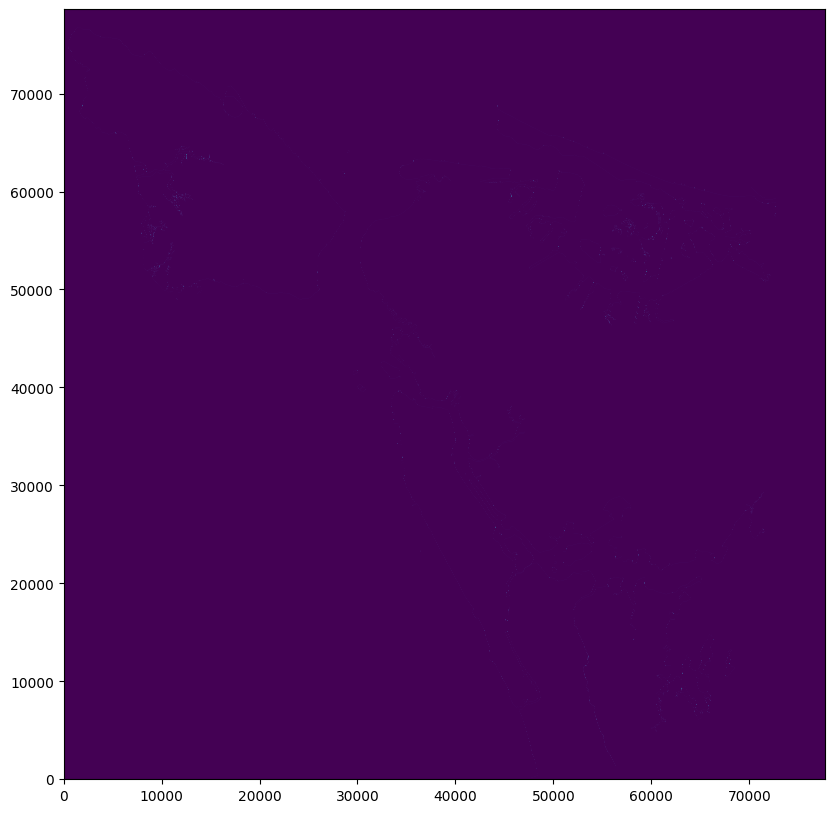

In [48]:
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

## Rasterize Line Values
---

In [ ]:
# Load Data
rst = '/workspace/data-sets/Land_Cover/nyc-lc-2-2.tif'
shape = '/workspace/data-sets/SHORELINE/SHORELINE.shp'

In [ ]:
layer_list = fiona.listlayers(plan)
plan_data_list = []
for layer_name in layer_list:
    plan_data_list.append(gpd.read_file(plan, layer=layer_name))
raster = rasterio.open(rst)
v_df = plan_data_list[2]

In [ ]:
# DELETE AFTER THIS LINE

In [46]:
# Save modified gpd (This is needed to create a shape file from the gdb
# Note you can only have one geometry in the gdf to save it

# vector.to_file(driver = 'ESRI Shapefile', filename= "test.shp")

In [57]:
# # Extract Features from Base Raster
ulx, xres, xskew, uly, yskew, yres  = raster.GetGeoTransform()
lrx = ulx + (raster.RasterXSize * xres)
lry = uly + (raster.RasterYSize * yres)
width = raster.RasterXSize
height = raster.RasterYSize

In [ ]:
# --config 'NUM_THREADS=ALL_CPUS GDAL_CACHEMAX=2000'

In [ ]:
# nn = gdal.Grid("nn-test.tif", 
#                'test.shp', 
#                zfield='z', 
#                algorithm='nearest',
#                outputBounds=[ulx,uly,lrx,lry],
#                width=width,
#                height=height)

In [ ]:
# nn = None

In [ ]:
# ts = gdal.Open("nn-test.tif")
# band = ts.GetRasterBand(1)
# arr = band.ReadAsArray()
# plt.imshow(arr)

In [45]:
# # Plot raster
# fig, ax = plt.subplots(1, figsize = (10, 10))
# show(rasterized, ax = ax)
# plt.gca().invert_yaxis()

AttributeError: 'Dataset' object has no attribute 'crs'

In [ ]:
# Try this to see if we get a performance boost https://gis.stackexchange.com/questions/151339/rasterize-a-shapefile-with-geopandas-or-fiona-python

In [ ]:
rst = rasterio.open("/workspace/data-sets/Land_Cover/nyc-lc-2-2.tif")
meta = rst.meta.copy()
meta.update(compress='lzw')

out_fn='test-rasterio.tif'

with rasterio.open(out_fn, 'w+', **meta) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(vector.geometry, vector.z))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)

In [ ]:
geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector['id']))
rasterized = features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = -5,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = np.int16)

# rasterized = features.rasterize(geom,
#                                 out_shape = raster.shape,
#                                 fill = 0,
#                                 out = None,
#                                 transform = raster.transform,
#                                 all_touched = False,
#                                 default_value = 1,
#                                 dtype = None)

# https://rasterio.readthedocs.io/en/latest/api/rasterio.features.html#rasterio.features.rasterize

In [33]:
geom = [shapes for shapes in v_df.geometry]
raster = rasterio.open(raster)
rasterized = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = 0,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                default_value = 1,
                                dtype = None)

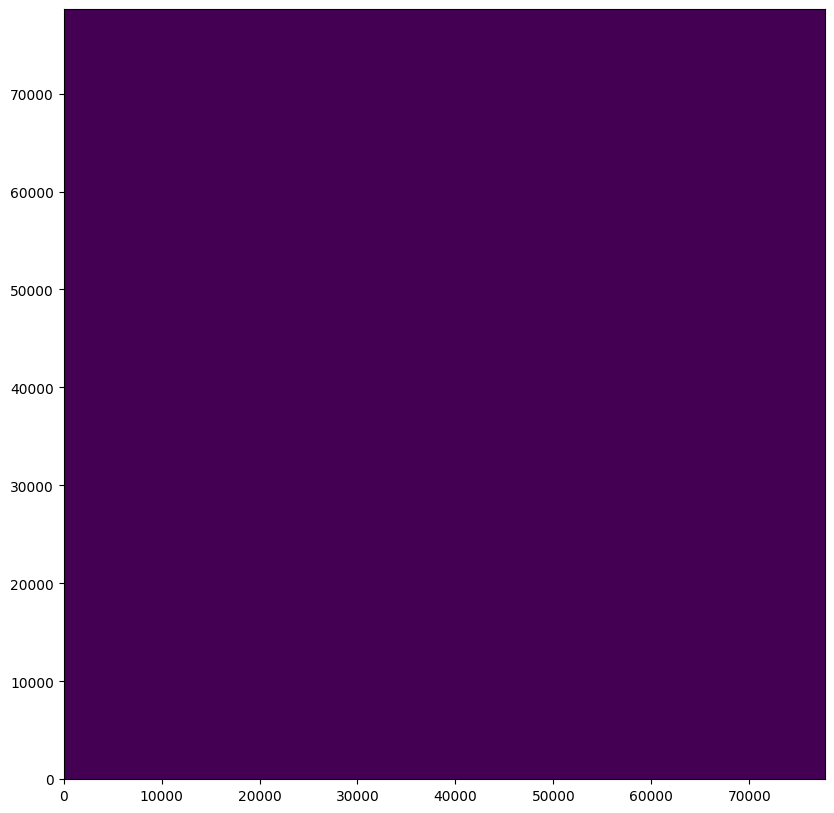

In [34]:
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

In [35]:
rasterized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
rasterized.min()

0

In [37]:
rasterized.max()

1

In [38]:
rasterized.shape

(78604, 77711)

In [ ]:
# #Write Raster to File 
# with rasterio.open(
#         "../temp/rasterized_vector.tif", "w",
#         driver = "GTiff",
#         transform = raster.transform,
#         dtype = rasterio.uint8,
#         count = 1,
#         width = raster.width,
#         height = raster.height) as dst:
#     dst.write(rasterized, indexes = 1)

First we'll start by extracting z-value features as shown in the 02 notebook.

In [ ]:
# def convert_3D_2D(geometry):
# #     '''
# #     Takes a GeoSeries of 3D Multi/Polygons (has_z) and returns a list of 2D Multi/Polygons
# #     '''
# #     new_geo = []
# #     for p in geometry:
# #         if p.has_z:
# #             if p.geom_type == 'Polygon':
# #                 lines = [xy[:2] for xy in list(p.exterior.coords)]
# #                 new_p = Polygon(lines)
# #                 new_geo.append(new_p)
# #             elif p.geom_type == 'MultiPolygon':
# #                 new_multi_p = []
# #                 for ap in p:
# #                     lines = [xy[:2] for xy in list(ap.exterior.coords)]
# #                     new_p = Polygon(lines)
# #                     new_multi_p.append(new_p)
# #                 new_geo.append(MultiPolygon(new_multi_p))
# #     return new_geo

# # # geodf_2d = gp.GeoDataFrame.from_file(vector) # plug_in your shapefile
# # # geodf_2d.geometry = convert_3D_2D(geodf_2d.geometry) # new geodf with 2D geometry series
# # test = convert_3D_2D(vector.geometry) # new geodf with 2D geometry series

## Rasterize Line Values
---

In [ ]:
# Load Data
vector = plan_data_list[2]

In [ ]:
# Extract Z Values
z_value = []
for feature in data.geometry:
    # Extract the 3 dimensional features
    coords = [list(line.coords) for line in feature][0]
    z = []
    
    for tup in coords:
        z.append(tup[2])
    z_value.append(z)

In [ ]:
# Take min of Z values per set (Logic - wate ingress at lowest point)
z_min = []
for values in z_value:
    z_min.append(min(values)

In [ ]:
# Append min values to list
data['z'] = z_min

In [ ]:
# Convert Multiline z to multiline

#TODO - Figure this out

In [ ]:
# Save modified gpd (This is needed to create a shape file from the gdb
# Note you can only have one geometry in the gdf to save it

vector.to_file(driver = 'ESRI Shapefile', filename= "test.shp")

## Rasterize Poly Values
---

In [ ]:
https://gis.stackexchange.com/questions/136059/convert-vector-point-shape-to-raster-tif-using-python-gdal-lib-in-qgis
https://gis.stackexchange.com/questions/308002/how-can-i-convert-shapefile-to-raster-and-mask-using-gdal-python-3
https://pygis.io/docs/e_raster_rasterize.html

In [ ]:
https://gdal.org/programs/gdal_rasterize.html